# **EXPLORATORY DATA ANALYSIS**

### **Keterangan Data**

|Variable|Description|
|---|---|
Age|Age|
Job|Type of job|
Marital|Marital status|
Education|Education Level|
Default|Has credit in default?|
Balance|Average yearly balance|
Housing|Has housing loan?|
Loan|Has personal loan?|
Contact|Contact communication type|
Day|Last contact day of the month|
Month|Last contact month of year|
Duration|Last contact duration, in seconds|
Campaign|Number of contacts performed during this campaign and for this client|
Pdays|Number of days that passed by after the client was last contacted from a previous campaign, -1 means client was not previously contacted|
Previous|Number of contacts performed before this campaign and for this client|
Poutcome|Outcome of the previous marketing campaign|
y|Has the client subscribed a term deposit?|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

C:\Users\asus\AppData\Local\Temp\ipykernel_352\538630775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
'''Import data dari csv'''

df = pd.read_csv('bank-full.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
'''Memeriksa kolom yang bertipe string (kategorikal) dengan melihat unique value dan memastikan apakah ada data yang harus dibersihkan'''

#mengumpulkan kolom kategorikal kedalam 1 variabel untuk memudahkan pemrosesan
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

#mencari nilai unique dari masing-masing kolom 
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital':
['married' 'single' 'divorced']
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default':
['no' 'yes']
Unique values in 'housing':
['yes' 'no']
Unique values in 'loan':
['no' 'yes']
Unique values in 'contact':
['unknown' 'cellular' 'telephone']
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in 'y':
['no' 'yes']


In [4]:
'''Membersihkan "." dari data'''

#menghapus '.' dari data
df['job'] = df['job'].str.replace('.','') 

#mengecek kembali apakah '.' sudah dihilangkan dari kolom 'job'
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [5]:
'''Penambahan kolom age_group untuk mengelompokan usia untuk proses analisa data'''

bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Tentukan rentang usia
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '70+',]  # Tentukan label untuk setiap rentang usia

# mengelompokkan usia
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,41-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,41-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-40


In [6]:
# Mengubah nama kolom 'y' menjadi 'respon'
df.rename(columns={'y': 'response'}, inplace=True)

# Simpan data inference ke dalam file CSV untuk digunakan pada tableau
df.to_csv('Bank_Marketing_Clean_Data.csv', index=False)

# copy data untuk eksplorasi dan data asli akan disimpan untuk visualisasi pada Tableau
data = df.copy()
data["response_enc"] = data["response"].map({"yes": 1, "no": 0})

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,age_group,response_enc
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-60,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,41-50,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-40,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,41-50,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-40,0


Total Data: 45211
Subscribing: 5289
Not Subscribing: 39922
Conversion Rate: 0.11698480458295547


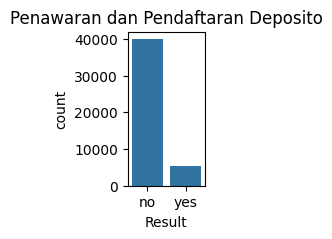

In [8]:
'''Visualisasi jumlah pendaftaran deposito berbanding dengan jumlah konsumen yang dihubungi'''

#membuat diagram batang
plt.figure(figsize=(1, 2))
sns.countplot(x=data['response'])
plt.title('Penawaran dan Pendaftaran Deposito')
plt.xlabel('Result')

#menghitung rata-rata transaksi atau conversion rate secara total
count_yes = data['response'].value_counts()['yes']
count_no = data['response'].value_counts()['no']
total_data = count_yes+count_no
conversion_rate = (count_yes / total_data)

print('Total Data: {}'.format(total_data))
print('Subscribing: {}'.format(count_yes))
print('Not Subscribing: {}'.format(count_no))
print('Conversion Rate: {}'.format(conversion_rate))

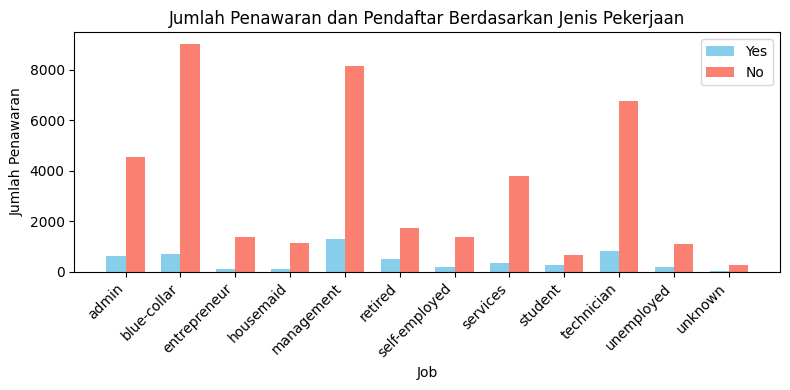

response         no   yes
job                      
admin          4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [9]:
'''Membuat diagram batang yang menunjukkan hubungan jenis pekerjaan dan pendaftaran deposito'''

subscription_by_job = data.groupby('job')['response'].value_counts().unstack(fill_value=0)
job_counts = data.groupby(['job', 'response']).size().unstack().fillna(0)
plt.figure(figsize=(8, 4))
bar_width = 0.35
positions = np.arange(len(subscription_by_job))
plt.bar(positions - bar_width/2, subscription_by_job['yes'], bar_width, label='Yes', color='skyblue')
plt.bar(positions + bar_width/2, subscription_by_job['no'], bar_width, label='No', color='salmon')

plt.xlabel('Job')
plt.ylabel('Jumlah Penawaran')
plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Jenis Pekerjaan')
plt.xticks(positions, subscription_by_job.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print(job_counts)


Porsi penawaran terbanyak diberikan kepada nasabah yang bekerja sebagai buruh yang berjumlah 9024 penawaran namun untuk penerimaan terbanyak ada di nasabah yang bekerja di tingkat manajerial dengan 1301 kampanye yang berhasil.  
  
Berdasarkan tingkat penerimaan yang tinggi, nasabah yang bekerja di tingkat manajerial bisa dijadikan sasaran utama untuk kampanye berikutnya, disusul oleh nasabah yang bekerja sebagai teknisi dan buruh.

Number of People Accepting Campaign by Job and Education Status:
education      primary  secondary  tertiary  unknown
job                                                 
admin               12        502        99       18
blue-collar        218        433        24       33
entrepreneur        12         52        52        7
housemaid           49         34        22        4
management          22         97      1134       48
retired            178        207       101       30
self-employed        5         43       134        5
services            29        296        25       19
student             16        151        59       43
technician          13        518       286       23
unemployed          34        108        56        4
unknown              3          9         4       18


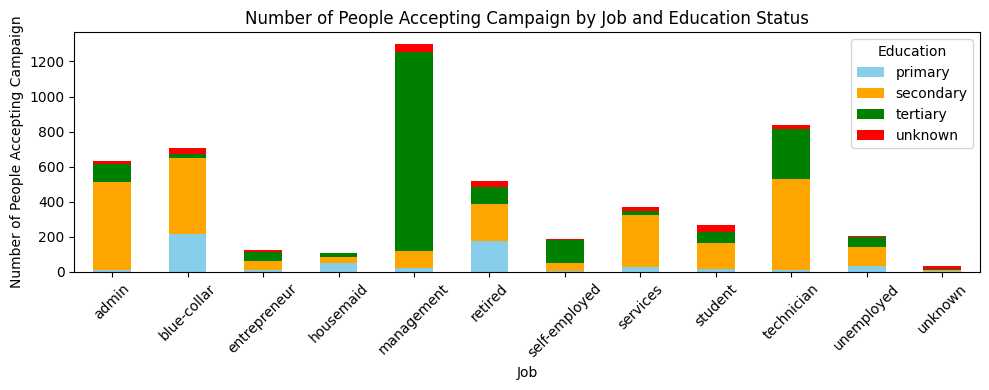

Number of People Accepting Campaign by Job and Education Status:
education      primary  secondary  tertiary  unknown
job                                                 
admin               12        502        99       18
blue-collar        218        433        24       33
entrepreneur        12         52        52        7
housemaid           49         34        22        4
management          22         97      1134       48
retired            178        207       101       30
self-employed        5         43       134        5
services            29        296        25       19
student             16        151        59       43
technician          13        518       286       23
unemployed          34        108        56        4
unknown              3          9         4       18


In [25]:
accepted_campaign = data[data['response'] == 'yes']  # Filter dataframe for 'yes' responses
accepted_campaign_count = accepted_campaign.groupby(['job', 'education']).size().unstack()

print("Number of People Accepting Campaign by Job and Education Status:")
print(accepted_campaign_count)

# Create a bar plot
plt.figure(figsize=(12, 6))
accepted_campaign_count.plot(kind='bar', stacked=True, figsize=(10, 4), color=['skyblue', 'orange', 'green', 'red'], ax=plt.gca())
plt.xlabel('Job')
plt.ylabel('Number of People Accepting Campaign')
plt.title('Number of People Accepting Campaign by Job and Education Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Education', loc='upper right')
plt.tight_layout()
plt.show()

print("Number of People Accepting Campaign by Job and Education Status:")
print(accepted_campaign_count)


Grafik ini menunjukkan tingkat pendidikan setiap nasabah yang menerima kampanye marketing berdasarkan pekerjaannya. Dapat dilihat untuk pekerjaan tingkat manajerial paling banyak berasal dari tingkat pendidikan tinggi (tertiary) hal ini kemungkinan dikarenakan syarat untuk bekerja pada bidang tersebut memang harus menyelesaikan pendidikan tinggi.
  
Pekerjaan lainnya rata-rata didominasi oleh tingkat pendidikan menengah (secondary) dimana terlihat bahwa pekerjaan nasabah tersebut kemungkinan tidak mengharuskan kelulusan pada pendidikan tinggi.
  
Perlu tinjauan lebih lanjut apakah ada pengaruh dari tingkat pendidikan terhadap respon penerimaan dari nasabah, namun berdasarkan data ini dapat dikatakan bahwa tingkat pendidikan menengah (secondary) dan tinggi (tertiary) yang lebih banyak memberikan respon positif sehingga bisa dijadikan acuan dalam melakukan kampanye berikutnya.

C:\Users\asus\AppData\Local\Temp\ipykernel_352\3763704905.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_by_age_group = data.groupby(['age_group', 'response']).size().unstack(fill_value=0)
C:\Users\asus\AppData\Local\Temp\ipykernel_352\3763704905.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_age_counts = data.groupby(['age_group', 'response']).size().unstack().fillna(0)


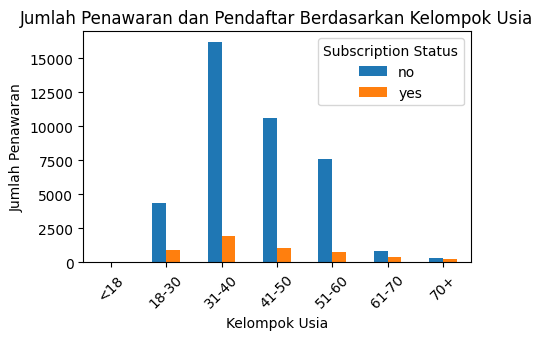

response      no   yes
age_group             
<18            0     0
18-30       4345   928
31-40      16176  1913
41-50      10592  1063
51-60       7625   785
61-70        865   365
70+          319   235


In [26]:
'''Membuat diagram batang yang menunjukkan hubungan kelompok usia dan pendaftaran deposito'''

subscription_by_age_group = data.groupby(['age_group', 'response']).size().unstack(fill_value=0)
subscription_by_age_group.plot(kind='bar', stacked=False, figsize=(5, 3))
group_age_counts = data.groupby(['age_group', 'response']).size().unstack().fillna(0)

plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penawaran')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

print(group_age_counts)


Number of People Accepting Campaign by Job and Education Status:
marital    divorced  married  single
age_group                           
<18               0        0       0
18-30            11      123     794
31-40           158      913     842
41-50           175      678     210
51-60           160      572      53
61-70            63      292      10
70+              55      177       3


C:\Users\asus\AppData\Local\Temp\ipykernel_352\3778991362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_campaign_count = accepted_campaign.groupby(['age_group', 'marital']).size().unstack()


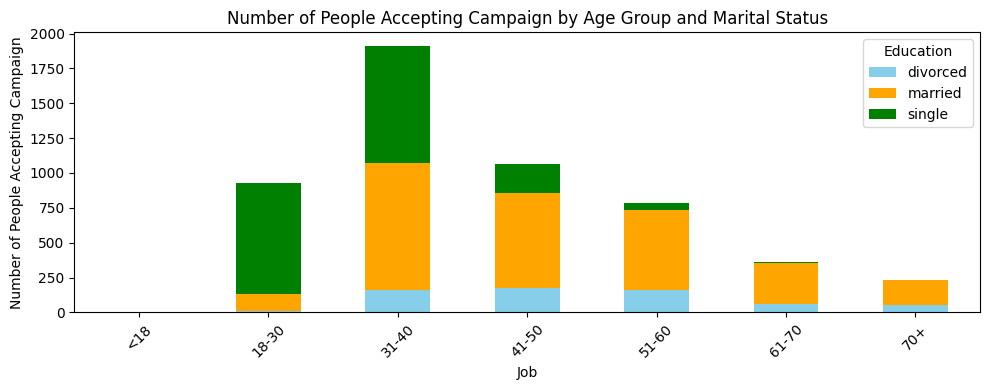

Number of People Accepting Campaign by Age Group and Marital Status:
marital    divorced  married  single
age_group                           
<18               0        0       0
18-30            11      123     794
31-40           158      913     842
41-50           175      678     210
51-60           160      572      53
61-70            63      292      10
70+              55      177       3


In [35]:
accepted_campaign_count = accepted_campaign.groupby(['age_group', 'marital']).size().unstack()

print("Number of People Accepting Campaign by Job and Education Status:")
print(accepted_campaign_count)

# Create a bar plot
plt.figure(figsize=(12, 6))
accepted_campaign_count.plot(kind='bar', stacked=True, figsize=(10, 4), color=['skyblue', 'orange', 'green', 'red'], ax=plt.gca())
plt.xlabel('Job')
plt.ylabel('Number of People Accepting Campaign')
plt.title('Number of People Accepting Campaign by Age Group and Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Education', loc='upper right')
plt.tight_layout()
plt.show()

print("Number of People Accepting Campaign by Age Group and Marital Status:")
print(accepted_campaign_count)


Nasabah yang memberikan respon positif terhadap penawaran marketing kebanyakan adalah mereka yang sudah menikah, terlihat dari warna kuning pada grafik yang menggambarkan nasabah yang sudah menikah ada di setiap kelompok usia dan terlihat mendominasi dibandingkan dengan mereka yang lajang atau sudah bercerai.

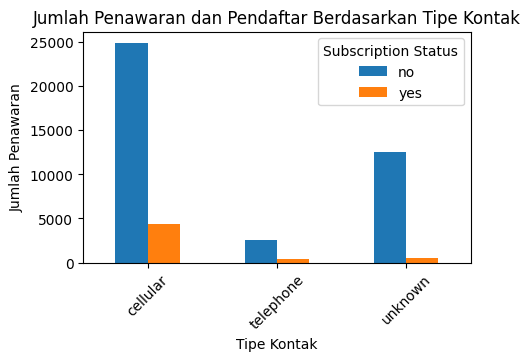

response      no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530


In [28]:
'''Membuat diagram batang yang menunjukkan hubungan Tipe Kontak dan pendaftaran deposito'''

subscription_by_contact = data.groupby(['contact', 'response']).size().unstack(fill_value=0)
subscription_by_contact.plot(kind='bar', stacked=False, figsize=(5, 3))
group_age_counts = data.groupby(['contact', 'response']).size().unstack().fillna(0)

plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Tipe Kontak')
plt.xlabel('Tipe Kontak')
plt.ylabel('Jumlah Penawaran')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

print(group_age_counts)


In [37]:
'''Menghitung nilai tengah dari berapa kali seorang nasabah dihubungi hingga mendapatkan
respon positif'''

average_campaigns = accepted_campaign['campaign'].median()

print("Median jumlah kampanye yang dilakukan pada satu nasabah hingga diterima:", average_campaigns)


Median jumlah kampanye yang dilakukan pada satu nasabah hingga diterima: 2.0
